In [1]:
import librosa
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

plt.style.use('fivethirtyeight')

In [15]:
amplitudes, sample_rate = librosa.load("D:/210.wav")

214767 points, 9.74 sec, sr 22050


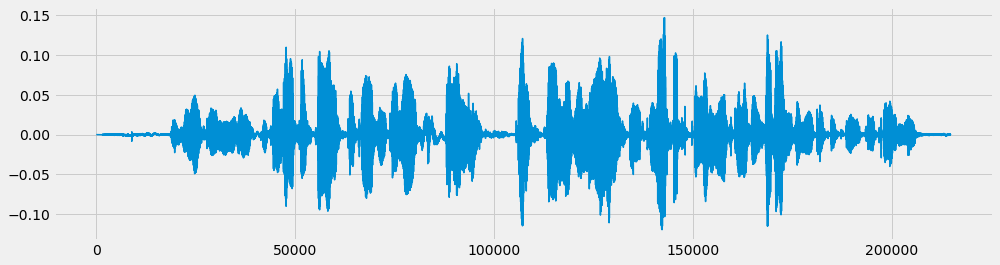

In [209]:
print(f"{len(amplitudes)} points, {len(amplitudes) / sample_rate} sec, sr {sample_rate}")
plt.figure(figsize=[15, 4])
plt.plot(amplitudes,linewidth=1.5);

In [98]:
record_voice = [i**2 for i in amplitudes]
valid_values = []
for index, i in enumerate(record_voice):
    if i > 0.00001:
        valid_values.append(index)

valid_voice = [amplitudes[i] for i in valid_values]

In [161]:
mackup = len(valid_voice)//20
start = 0
end = mackup
valid_voice_mackup = []
for i in range(20):
    valid_voice_mackup.append(np.abs(valid_voice[start:end]))
    start += mackup
    end += mackup

214767 points, 9.74 sec, sr 22050


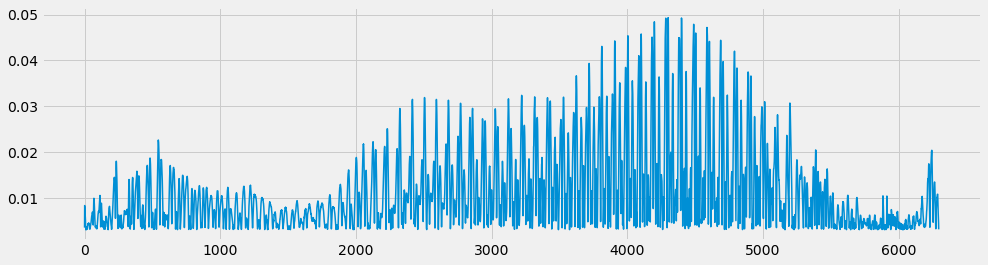

In [208]:
print(f"{len(amplitudes)} points, {len(amplitudes) / sample_rate} sec, sr {sample_rate}")
plt.figure(figsize=[15, 4])
plt.plot(valid_voice_mackup[0],linewidth=1.5);

In [167]:
Mean_values = []
Max_values = []
Dis_values = []

for fragment in valid_voice_mackup:
    Mean_values.append(np.mean(fragment))
    Max_values.append(np.max(fragment))
    Dis_values.append(np.var(fragment, ddof=1))

In [3]:
def extracting_metafeatich(path):
    amplitudes, _ = librosa.load(path)

    record_voice = [i**2 for i in amplitudes]
    valid_values = []
    for index, i in enumerate(record_voice):
        if i > 0.00001:
            valid_values.append(index)

    valid_voice = [amplitudes[i] for i in valid_values]

    mackup = len(valid_voice)//20
    start = 0
    end = mackup
    valid_voice_mackup = []
    for i in range(20):
        valid_voice_mackup.append(np.abs(valid_voice[start:end]))
        start += mackup
        end += mackup

    Mean_values = {}
    Max_values = {}
    Dis_values = {}
    head_mean = []
    head_max = []
    head_dis = []


    for index, fragment in enumerate(valid_voice_mackup):
        head_mean.append('head' + str(index))
        head_max.append('max' + str(index))
        head_dis.append('dis' + str(index))

        Mean_values.update({head_mean[index]: np.mean(fragment)})
        Max_values.update({head_max[index]: np.max(fragment)})
        Dis_values.update({head_dis[index]: np.var(fragment, ddof=1)})

    header = head_mean + head_max + head_dis
    data = {**Mean_values, **Max_values, **Dis_values}

    return data, header

In [4]:
data, header = extracting_metafeatich('D:/Datasets/Mafia_DGTY/WAV/00016.wav')

In [263]:
df = pd.DataFrame(data, columns = header, index=[0])
df

,head0,head1,head2,head3,head4,head5,head6,head7,head8,head9,...,dis10,dis11,dis12,dis13,dis14,dis15,dis16,dis17,dis18,dis19
0,0.012625,0.020447,0.013078,0.009778,0.00996,0.024156,0.021312,0.018316,0.015265,0.02207,...,0.000118,0.000242,0.000263,0.000597,0.000159,0.000141,0.000228,0.000227,0.000117,0.000077


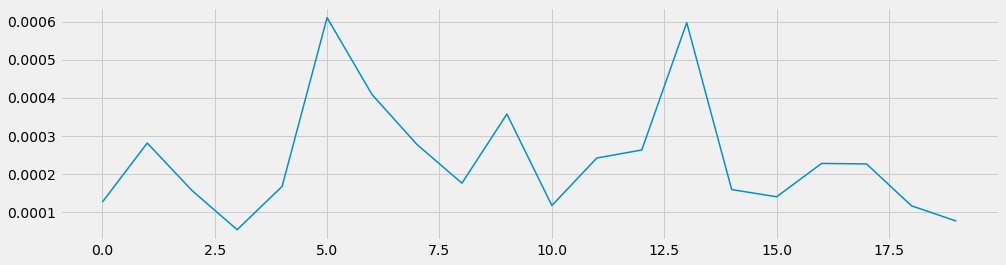

In [206]:
plt.figure(figsize=[15, 4])
plt.plot(Dis_values,linewidth=1.5);

In [266]:
path = 'D:/Datasets/Mafia_DGTY/WAV/'
test = 'D:/Datasets/Mafia_DGTY/quls/test/'
# path = test

data = []
for root, dirs, way in os.walk(path):
    for filename in way:
        dir_file = path + filename
        values, header = extracting_metafeatich(dir_file)
        data.append(values)

In [267]:
df = pd.DataFrame(data, columns=header)
df

,head0,head1,head2,head3,head4,head5,head6,head7,head8,head9,...,dis10,dis11,dis12,dis13,dis14,dis15,dis16,dis17,dis18,dis19
0,0.016277,0.006233,0.075848,0.009772,0.014949,0.016512,0.014030,0.005760,0.006219,0.011358,...,0.000005,0.000007,0.000005,0.000007,0.000122,0.000230,0.001498,0.001967,0.001021,0.000065
1,0.008305,0.016532,0.008861,0.007628,0.017519,0.018906,0.017435,0.017452,0.010600,0.013553,...,0.000454,0.000083,0.000408,0.000262,0.000319,0.000210,0.000199,0.000181,0.000271,0.000030
2,0.017936,0.013462,0.008645,0.013914,0.010196,0.013315,0.009464,0.012242,0.011940,0.009805,...,0.000041,0.000022,0.000090,0.000029,0.000009,0.000133,0.000016,0.000040,0.000037,0.000006
3,0.017847,0.008128,0.016948,0.020940,0.016365,0.013513,0.010362,0.015210,0.006400,0.019553,...,0.000460,0.000219,0.000110,0.000247,0.000127,0.000156,0.000122,0.000025,0.000390,0.000020
4,0.041196,0.030912,0.030515,0.024799,0.022128,0.019390,0.016601,0.017114,0.014494,0.015473,...,0.000224,0.000273,0.000128,0.000230,0.000187,0.000116,0.000199,0.000024,0.000279,0.000033
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
519,0.049427,0.081624,0.063019,0.063844,0.085612,0.055842,0.051494,0.038790,0.046148,0.053511,...,0.005329,0.003782,0.001894,0.003740,0.003231,0.001134,0.002558,0.002121,0.005690,0.001054
520,0.089090,0.075559,0.068826,0.049207,0.059642,0.060882,0.052627,0.057791,0.045283,0.058974,...,0.003972,0.001799,0.005563,0.004764,0.002513,0.004685,0.002696,0.001769,0.002237,0.000840
521,0.062915,0.079773,0.083619,0.055937,0.065711,0.090234,0.041377,0.068871,0.064183,0.084589,...,0.002655,0.008147,0.005531,0.004289,0.005737,0.003527,0.002329,0.006823,0.003853,0.000916
522,0.061590,0.034818,0.035145,0.042538,0.043534,0.067942,0.040796,0.021679,0.067187,0.049112,...,0.005554,0.005914,0.003711,0.002504,0.007063,0.003523,0.002618,0.006529,0.006063,0.001537


In [268]:
df.to_csv('D:/Datasets/Mafia_DGTY/Global_dis.csv')

In [6]:
header

['head0',
 'head1',
 'head2',
 'head3',
 'head4',
 'head5',
 'head6',
 'head7',
 'head8',
 'head9',
 'head10',
 'head11',
 'head12',
 'head13',
 'head14',
 'head15',
 'head16',
 'head17',
 'head18',
 'head19',
 'max0',
 'max1',
 'max2',
 'max3',
 'max4',
 'max5',
 'max6',
 'max7',
 'max8',
 'max9',
 'max10',
 'max11',
 'max12',
 'max13',
 'max14',
 'max15',
 'max16',
 'max17',
 'max18',
 'max19',
 'dis0',
 'dis1',
 'dis2',
 'dis3',
 'dis4',
 'dis5',
 'dis6',
 'dis7',
 'dis8',
 'dis9',
 'dis10',
 'dis11',
 'dis12',
 'dis13',
 'dis14',
 'dis15',
 'dis16',
 'dis17',
 'dis18',
 'dis19']